<a href="https://colab.research.google.com/github/amnacas/Portifolio/blob/master/AirBnB_Londres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/amnacas/Portifolio/blob/master/London-Airbnb.png?raw=true">

<center><a href="http://www.freepik.com">Designed by Freepik</a></center> 



---




# **Análise dos dados do Airbnb - Londres**

##**Motivação**

  O Airbnb é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem. 
  
  Atualmente com seu projeto inovador fez com que fosse é reconhecida como uma mas maiores empresas hoteleiras mas **sem possuir nenhum hotel**!

  Além de apresentar uma plataforma inovadora, o Airbnb também disponibiliza uma grande quantidade de dados do site referentes as principais cidades do mundo atraves do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) contribuindo assim para o desenvolvimento de projetos e soluções de *Data Science*.

  O *dataset* fornecido inclui dados os quais podem ser analisados e usados para segurança, decisões de negócios, compreensão do comportamento e desempenho de clientes e provedores (hosts) na plataforma, iniciativas de marketing de orientação, implementação de serviços adicionais inovadores e muito mais.

  Neste *notebook* iremos realizar uma **análise descritiva e exploratória** dos dados públicos fornecidos pelo Airbnb da cidade de **Londres na Inglaterra**.  




## **Dados**



Todos os dados utilizados aqui foram compilados pela Airbnb em 09 de setembro de 2020 e foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Os quais foram analisados, limpos e agregados conforme necessário pelo Airbnb para facilitar a discussão pública.  

Para uma análise exploratória inicial, serão baixados apenas o seguinte arquivo:

*   	listings.csv - 	*Summary information and metrics for listings in London (good for visualisations)*

Para realizar a análise de sentimentos das reviews será utilizado o seguinte arquivo:

*     reviews.csv	- *Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).*



## **Objetivos**

## **Dicionário de Variáveis**

O arquivo *listings.csv* importado possui 12 colunas, conforme as variáveis listadas a seguir:

**Listagem e descrição das Variáveis:**
* *id* - número de id gerado para identificar o imóvel
* *name* - nome da propriedade anunciada
* *host_id* - número de id do proprietário (anfitrião) da propriedade
* *host_name* - Nome do anfitrião
* *neighbourhood_group* - esta coluna não contém nenhum valor válido
* *neighbourhood* - nome do bairro
* *latitude* - coordenada da latitude da propriedade
* *longitude* - coordenada da longitude da propriedade
* *room_type* - informa o tipo de quarto que é oferecido
price - preço para alugar o imóvel
* *minimum_nights* - quantidade mínima de noites para reservar
* *number_of_reviews* - número de reviews que a propriedade possui
* *last_review* - data do último review
* *reviews_per_month* - quantidade de reviews por mês
* *calculated_host_listings_count* - quantidade de imóveis do mesmo anfitrião
* *availability_365* - número de dias de disponibilidade dentro de 365 dias



O arquivo *reviews.csv* importado possui X colunas, conforme as variáveis listadas a seguir:

**Listagem e descrição das Variáveis:**

* *listing_id* - número de id gerado para identificar o imóvel 
*	*id* - número de id gerado para identificar o comentário
*	*date* - data que foi feito o comentário ou que foi alugado o imóvel?
*	*reviewer_id* - número de id gerado para identificar o usuário que fez o comentário 
*	*reviewer_name* - nome do usuário que fez o comentário 
*	*comments* - Comentário feito a respeito da locação

## **Bibliotecas que serão utilizadas**

In [ ]:
# Importando as bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# %matplotlib inline sets the backend of matplotlib to the 'inline' backend.
# With this backend, the output of plotting commands is displayed inline within
# frontends like the Jupyter notebook, directly below the code cell that produced it.
# The resulting plots will then also be stored in the notebook document.


## **Importação dos arquivos**

In [ ]:
# Importar o arquivo listing.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/visualisations/listings.csv")

In [ ]:
# Importar o arquivo reviews.csv para um DataFrame
reviews = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-09-11/data/reviews.csv.gz")

## **Análise dos Dados: *listing.csv*.**



Essa etapa tem como objetivo identificar e compreender como os dados do nosso DataFrame estão estruturados.

Conforme poderemos confirmar a seguir, esse dataset apresenta em torno de 77591 entradas com 16 colunas e é uma mistura entre valores categóricos e numéricos.

Nesse processo de analise dos dados será apresentado passo-a-passo o código e métodos para adquirir os dados. Carregando os dados no formato apropriado para análise e explicando o processo e resultados obtidos.

Mas primeiramente iremos verificar a cara do nosso *dataset* ao exibir as suas 5 primeiras entradas.

In [ ]:
# Visualizando as 5 primeiras entradas do Dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,87,2,192,2020-03-26,1.50,3,256
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,3,365
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.68,1,350
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,225,4,42,2019-11-02,0.36,15,351
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


### **Entendendo nosso Dataset**

Esse *dataset* que estamos utilizando é uma versão "resumida" dos dados do Airbnb. A versão completa (*listings.csv.gz*) com todos os dados pode ser obtida na mesma pagina da onde baixamos o arquivo *listtings.csv*.

O primeiro questionamento quanto ao dataset que estamos trabalhando é a respeito de **quais são as variáveis, tipos de variáveis e o número de entradas o nosso conjunto de dados possui**.

Por isso vamos identificar a quantidade de entradas que nosso conjunto de dados possui e verificar os tipo de cada coluna.



In [ ]:
# Verificando o número de entradas  e os tipos de dados nesse DataFrame
len(df)
print("Variáveis:{}".format(df.shape[1]))
print("Entradas: ", len(df))

print("\nTipos das variáveis:")
df.dtypes


Variáveis:16
Entradas:  77591

Tipos das variáveis:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Em seguida iremos avaliar a qualidade do nosso *dataset*. O qual está diretamente relacionada com a **quantidade de valores ausentes**.

Essa avaliação será feita através do cálculo da porcentagem de valores ausentes, isso é, a soma dos valores ausentes dividido pela quantidade de variáveis.

* Dessa forma, é possivel verificar que a coluna *neighbourhood_group* possui 100% dos seus valores faltantes;
* As variáveis *reviews_per_month* e *last_review* possuem valores nulos em aproximadamente 30% das linhas;
* As variáveis *name* e *host_name* têm menos de 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.273472
last_review                       0.273472
name                              0.000296
host_name                         0.000180
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Agora, para termos uma idéia de como essas variáveis estão distribuidas iremos plotar os histogramas:

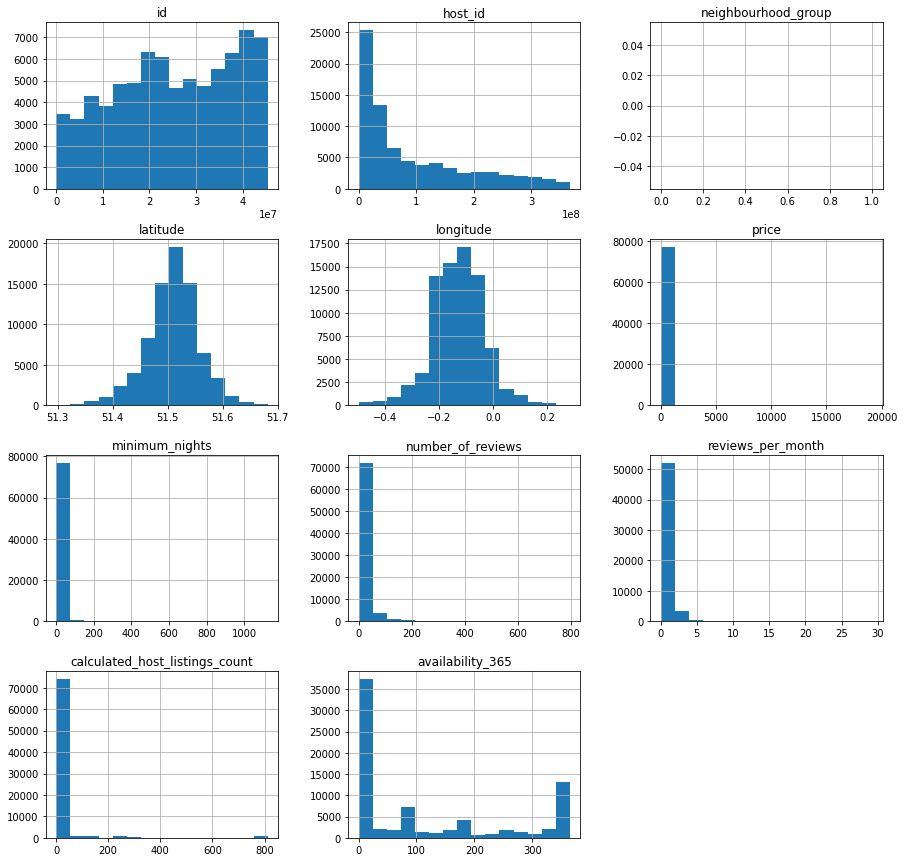

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

### **Identificando *outliers*:**

Analisando a distribuição dos histogramas é possivel verificar indicios da presença de *outliers*.

*Outliers* são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. 

Por exemplo, nas variáveis *calculated_host_listings_count*, *minimum_nights* e *price* oS valores não seguem uma distribuição e distorcem a representação gráfica.

Existem duas formas rápidas de se detectar *outliers*: 
* Resumo estatístico por meio do método *describe()*
* Plotar *boxplots* para a variável.


#### **Resumo estatístico**

In [ ]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,77591.000000,77591.000000,77591.000000,56372.000000,77591.000000,77591.000000
mean,119.363058,5.000567,16.020363,0.688351,18.442358,116.532446
std,324.422701,22.128136,35.946123,0.930677,88.339788,141.119061
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,44.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,75.000000,2.000000,3.000000,0.360000,1.000000,44.000000
75%,125.000000,3.000000,15.000000,0.900000,4.000000,242.000000
max,19133.000000,1125.000000,796.000000,29.230000,812.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável *price* possui 75% do valor abaixo de 125, porém seu valor máximo é 19133.
* A quantidade mínima de noites (*minimum_nights*) está acima do limite real de 365 dias no ano.

####**O *Boxplot*.**

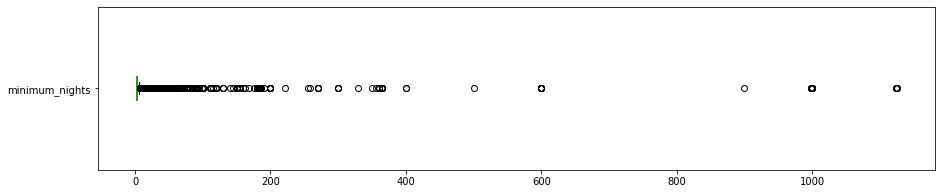

minimum_nights: 
1084 entradas
valores acima de 30:
1.3971%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("valores acima de 30:")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

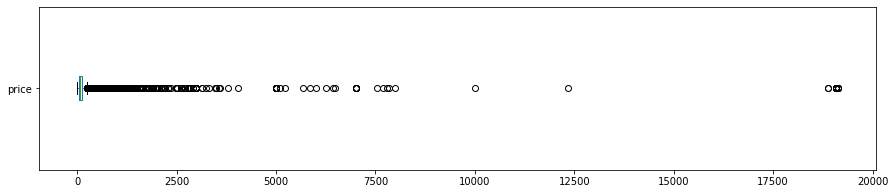


price: valores acima de 600
1102 entradas
1.4203%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 600 para price
print("\nprice: valores acima de 600")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

###**Histogramas sem outliers**

Já que identificamos *outliers* nas variáveis *price* e *minimum_nights*, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

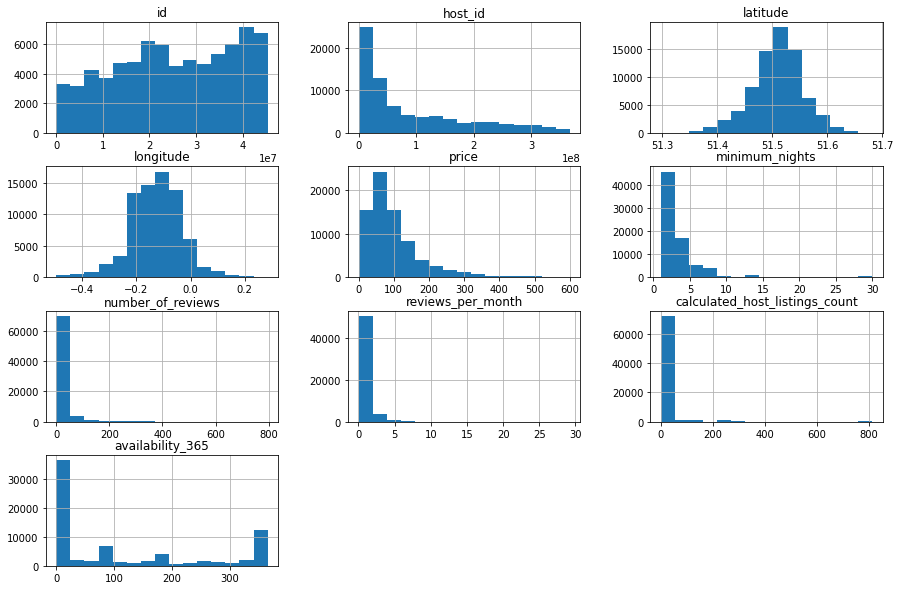

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Correlação entre váriaveis**

A análise de correlação busca identificar se existe alguma relação entre duas variáveis.

Essa relação entre duas variáveis pode ser mensurada, e é função do coeficiente de correlação estabelecera intensidade dessa correlação. 

Para avaliarmos a correlação entre as variáveis de interesse desse dataset será criada uma matriz de correlação e a partir dessa matriz será plotado um *heatmap* utilizando a biblioteca *seaborn*.

#### **Matriz de correlação**

Para montarmos a matriz de correlação devemos escolher as variáveis de interesse dentro de nosso dataframe e utilizar a função *.corr()* conforme apresentado a seguir:

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.056182,-0.087121,-0.094877,0.346240,0.098125
minimum_nights,0.056182,1.000000,-0.076394,-0.119664,0.016214,0.017580
number_of_reviews,-0.087121,-0.076394,1.000000,0.753623,-0.053688,0.097231
reviews_per_month,-0.094877,-0.119664,0.753623,1.000000,-0.047006,0.123041
calculated_host_listings_count,0.346240,0.016214,-0.053688,-0.047006,1.000000,-0.010203
availability_365,0.098125,0.017580,0.097231,0.123041,-0.010203,1.000000


#### **Plotando o *heatmap* de correlação**

Para plotar o *heatmap* faremos uso da biblioteca *seaborn* conforme a seguir:

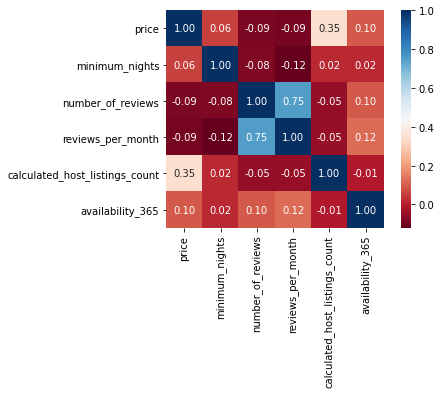

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True,
            linecolor='white', annot=True);

### **Qual tipo de imóvel é mais alugado em Londres pelo Airbnb?**

Quem já teve a oportunidade de alugar no site do do Airbnb, sabe que existem opções de locação de apartamentos/casas, um quarto individual ou até mesmo dividir o quarto com outras pessoas. 

Neste *dataset* temos a  variável *room_type* o qual indica o tipo de locação anunciada no Airbnb.

A partir desses dados vamos verificar a quantidade de ocorrências de cada um dos tipos de aluguel através do método *value_counts()*: 

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    41065
Private room       33153
Shared room          627
Hotel room           598
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.544318
Private room       0.439444
Shared room        0.008311
Hotel room         0.007927
Name: room_type, dtype: float64

A partir desses resultados é possivel verificar que aproximadamente **55%** dos anuncios são realizados para locação de **casas ou apartamentos inteiros** e aproximadamente **43%** correspondem a locação de **quartos individuais**. 

Indicando que a maior procura é por esses dois tipos de acomodação na cidade de Londres.

### **Qual seria a localidade mais cara de Londres?**

Para realizar esse tipo de análise, que é uma variável em função de outra, será utilizada o método *groupby()*.

Nesse caso será comparado os bairros (*neighbourhoods*) em função da média do preço de locação (*price*).

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Kensington and Chelsea    157.853395
Westminster               150.961183
City of London            139.923963
Camden                    118.730860
Richmond upon Thames      115.312160
Hammersmith and Fulham    110.994737
Wandsworth                107.738114
Islington                  99.926926
Merton                     97.111022
Southwark                  90.251339
Lambeth                    88.524752
Brent                      87.570513
Hounslow                   86.859296
Tower Hamlets              84.448765
Hackney                    82.996427
Name: price, dtype: float64

Como esse *dataset* nos da a informação de latitude e longitude para os imóveis, é possível plotar cada ponto com escala de cor para representar o preço de imóvel e então representando os *neighbourhoods*.

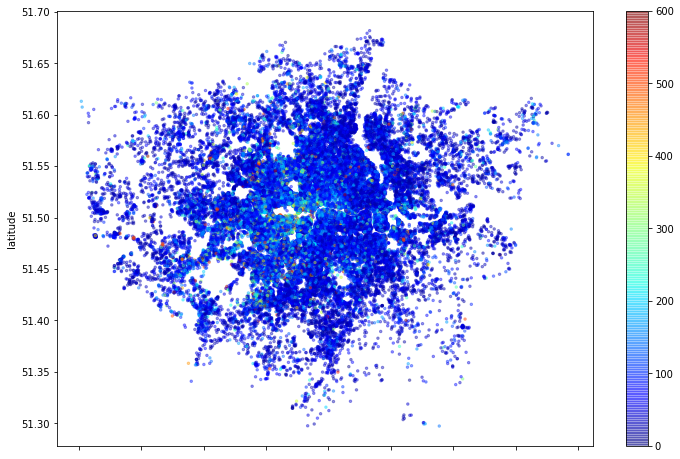

In [ ]:
# plotar os imóveis pela latitude-longitude em função do valor do imovel
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=6,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

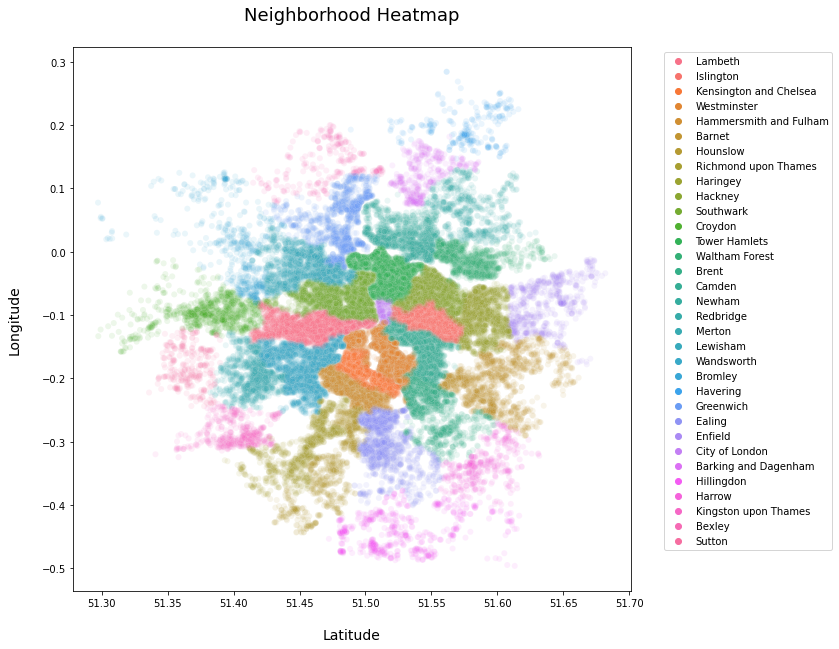

In [ ]:
# plotar os imóveis pela latitude-longitude em função do neighbourhood.

plt.figure(figsize=(10,10))
sns.scatterplot(x=df_clean['latitude'],
               y=df_clean['longitude'],
                hue=df_clean['neighbourhood'],
                alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=1)
plt.title('Neighborhood Heatmap\n', fontsize=18)
plt.ylabel('Longitude\n', fontsize=14)
plt.xlabel('\nLatitude', fontsize=14)
plt.show()

Olhando para esses dois gráficos, podemos notar que os bairros mais caros são aqueles que estão envolta da Cidade de Londres, ou seja, na área central da Região de Londres.

## **Análise dos Dados: *Reviews*.**

### **Entendendo nosso Dataset**

In [ ]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and..."
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...
2,11551,41044,2010-05-09,104133,Chase,Adriano was a fantastic host. We felt very at ...
3,11551,48926,2010-06-01,122714,John & Sylvia,We had a most wonderful stay with Adriano and ...
4,11551,58352,2010-06-28,111543,Monique,I'm not sure which of us misunderstood the s...


In [ ]:

len(reviews)
print("Variáveis: ", len(reviews))
print("Entradas:  {}\n".format(reviews.shape[1]))

print("Tipos das variáveis:")
reviews.dtypes

Variáveis:  1243036
Entradas:  6

Tipos das variáveis:


listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object